# Bib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Chargement des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Data/dataFlight_version_2.csv", index_col=0)
df.head(3).append(df.tail(3))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Quarter,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepDelay,DepDelayMinutes,CRSArrTime,ArrDelay,ArrDelayMinutes,Cancelled,Diverted,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MONTH_AB,FLIGHT_STATUS,Unique_Flight_ID
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,2,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,"Milwaukee, WI",Wisconsin,Orlando International Airport,"Orlando, FL",Florida,-2.0,0.0,1541,0.0,0.0,0.0,0.0,1.0,1066.0,5,0.0,0.0,0.0,0.0,0.0,May,0,671_AirTran Airways Corporation_2009-05-28
2013,2,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,"Grand Junction, CO",Colorado,Dallas/Fort Worth International Airport,"Dallas/Fort Worth, TX",Texas,14.0,14.0,1945,-3.0,0.0,0.0,0.0,1.0,773.0,4,0.0,0.0,0.0,0.0,0.0,Jun,0,3297_Envoy Air - MQ_2013-06-29
2010,3,8,31,2,Delta Airlines,Los Angeles International Airport,"Los Angeles, CA",California,Detroit Metropolitan Wayne County Airport,"Detroit, MI",Michigan,0.0,0.0,2035,-20.0,0.0,0.0,0.0,1.0,1979.0,8,0.0,0.0,0.0,0.0,0.0,Aug,0,1806_Delta Airlines_2010-08-31
2003,4,11,14,5,US Airways Inc.,Charleston International Airport,"Charleston, SC",South Carolina,Charlotte Douglas International Airport,"Charlotte, NC",North Carolina,-6.0,0.0,1319,-11.0,0.0,0.0,0.0,1.0,168.0,1,0.0,0.0,0.0,0.0,0.0,Nov,0,1457_US Airways Inc._2003-11-14
2012,2,5,15,2,Southwest Airlines,Chicago Midway International Airport,"Chicago, IL",Illinois,Nashville International Airport,"Nashville, TN",Tennessee,8.0,8.0,1950,-3.0,0.0,0.0,0.0,1.0,395.0,2,0.0,0.0,0.0,0.0,0.0,May,0,536_Southwest Airlines_2012-05-15
2003,2,4,29,2,United Airlines - UA,Washington Dulles International Airport,"Washington, DC",Virginia,Chicago O'Hare International Airport,"Chicago, IL",Illinois,-5.0,0.0,1724,-14.0,0.0,0.0,0.0,1.0,589.0,3,0.0,0.0,0.0,0.0,0.0,Apr,0,1241_United Airlines - UA_2003-04-29


In [ ]:
df = df.reset_index() # convertir l'index "Year" en colonne
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'OriginCityName', 'OriginStateName',
       'Dest', 'DestCityName', 'DestStateName', 'DepDelay', 'DepDelayMinutes',
       'CRSArrTime', 'ArrDelay', 'ArrDelayMinutes', 'Cancelled', 'Diverted',
       'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'MONTH_AB',
       'FLIGHT_STATUS', 'Unique_Flight_ID'],
      dtype='object')

In [ ]:
df.shape

(1164841, 30)

In [ ]:
index_to_drop = df[(df['Cancelled'] == 1) | (df['Diverted'] == 1)].index

# supprimer les lignes
df = df.drop(index_to_drop)

print(df.shape)

(1141468, 30)


In [ ]:
df["ArrDelay"] = df["ArrDelay"].fillna(0)
df.isna().sum()

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
Reporting_Airline     0
Origin                0
OriginCityName        0
OriginStateName       0
Dest                  0
DestCityName          0
DestStateName         0
DepDelay             60
DepDelayMinutes       0
CRSArrTime            0
ArrDelay              0
ArrDelayMinutes       0
Cancelled             0
Diverted              0
Flights               0
Distance              0
DistanceGroup         0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
MONTH_AB              0
FLIGHT_STATUS         0
Unique_Flight_ID      0
dtype: int64

In [ ]:
df = df.drop(columns=['Year', 'Quarter', 'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName', 'DepDelayMinutes', 'DepDelay',
       'CRSArrTime', 'ArrDelayMinutes', 'Distance', 'DistanceGroup', 'Flights', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'MONTH_AB', 'FLIGHT_STATUS', 'Unique_Flight_ID', 'Cancelled', 'Diverted'])

In [ ]:
df.head(3).append(df.tail(3))

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelay
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,Orlando International Airport,0.0
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,Dallas/Fort Worth International Airport,-3.0
2,8,31,2,Delta Airlines,Los Angeles International Airport,Detroit Metropolitan Wayne County Airport,-20.0
1164838,11,14,5,US Airways Inc.,Charleston International Airport,Charlotte Douglas International Airport,-11.0
1164839,5,15,2,Southwest Airlines,Chicago Midway International Airport,Nashville International Airport,-3.0
1164840,4,29,2,United Airlines - UA,Washington Dulles International Airport,Chicago O'Hare International Airport,-14.0


In [ ]:
df.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
Reporting_Airline    0
Origin               0
Dest                 0
ArrDelay             0
dtype: int64

# Catégorisation

In [ ]:
# Fonction pour déterminer la catégorie de retard en fonction de la valeur de ArrDelay
def categorize_arrdelay(arr_delay):
    if arr_delay <= 0:
        return 0
    elif 1 <= arr_delay <= 15:
        return 1
    elif 16 <= arr_delay <= 60:
        return 2
    else:
        return 3

# Appliquer la fonction de catégorisation à la colonne ArrDelay et créer la nouvelle colonne ArrDelayCategory
df['ArrDelayCategory'] = df['ArrDelay'].apply(categorize_arrdelay)

# Afficher les premières lignes du DataFrame avec la nouvelle colonne ArrDelayCategory
df.head(5).append(df.tail(5))

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelay,ArrDelayCategory
0,5,28,4,AirTran Airways Corporation,General Mitchell International Airport,Orlando International Airport,0.0,0
1,6,29,6,Envoy Air - MQ,Grand Junction Regional Airport,Dallas/Fort Worth International Airport,-3.0,0
2,8,31,2,Delta Airlines,Los Angeles International Airport,Detroit Metropolitan Wayne County Airport,-20.0,0
3,1,15,7,US Airways Inc.,Newark Liberty International Airport,Charlotte Douglas International Airport,32.0,3
4,8,7,1,Continental Air Lines Inc.,Boston Logan International Airport,Cleveland Hopkins International Airport,2.0,1
1164836,12,27,3,Delta Airlines,Hartsfield-Jackson Atlanta International Airport,San Antonio International Airport,-15.0,0
1164837,3,23,7,Southwest Airlines,McCarran International Airport,Phoenix Sky Harbor International Airport,-7.0,0
1164838,11,14,5,US Airways Inc.,Charleston International Airport,Charlotte Douglas International Airport,-11.0,0
1164839,5,15,2,Southwest Airlines,Chicago Midway International Airport,Nashville International Airport,-3.0,0
1164840,4,29,2,United Airlines - UA,Washington Dulles International Airport,Chicago O'Hare International Airport,-14.0,0


In [ ]:
# Compter le nombre de records pour chaque catégorie dans la colonne ArrDelayCategory
category_counts = df['ArrDelayCategory'].value_counts()

# Trier les résultats par l'index des catégories
category_counts = category_counts.sort_index()

# Afficher le nombre de records pour chaque catégorie
print(category_counts)

0    690824
1    233677
2     84644
3     66355
4     62105
5      3863
Name: ArrDelayCategory, dtype: int64


In [ ]:
df.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin',
       'Dest', 'ArrDelay', 'ArrDelayCategory'],
      dtype='object')

In [ ]:
import os

# Spécifier le chemin d'enregistrement
folder_path = "/content/drive/MyDrive/Data/"
file_name = "dataFlight_version_3.csv"
file_path = os.path.join(folder_path, file_name)

df.to_csv(file_path, index=False)

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/dataFlight_version_3.csv", index_col=0)
df = df.reset_index() # convertir l'index "Month" en colonne
df.head(3).append(df.tail(3))

Mounted at /content/drive


FileNotFoundError: ignored

# RandomForest

Précision: 0.5519987384688165

Rapport de classification:
               precision    recall  f1-score   support

           0       0.62      0.87      0.72    138094
           1       0.23      0.10      0.14     46769
           2       0.10      0.03      0.04     16925
           3       0.09      0.02      0.04     13357
           4       0.11      0.03      0.05     12385
           5       0.00      0.00      0.00       764

    accuracy                           0.55    228294
   macro avg       0.19      0.18      0.17    228294
weighted avg       0.44      0.55      0.47    228294



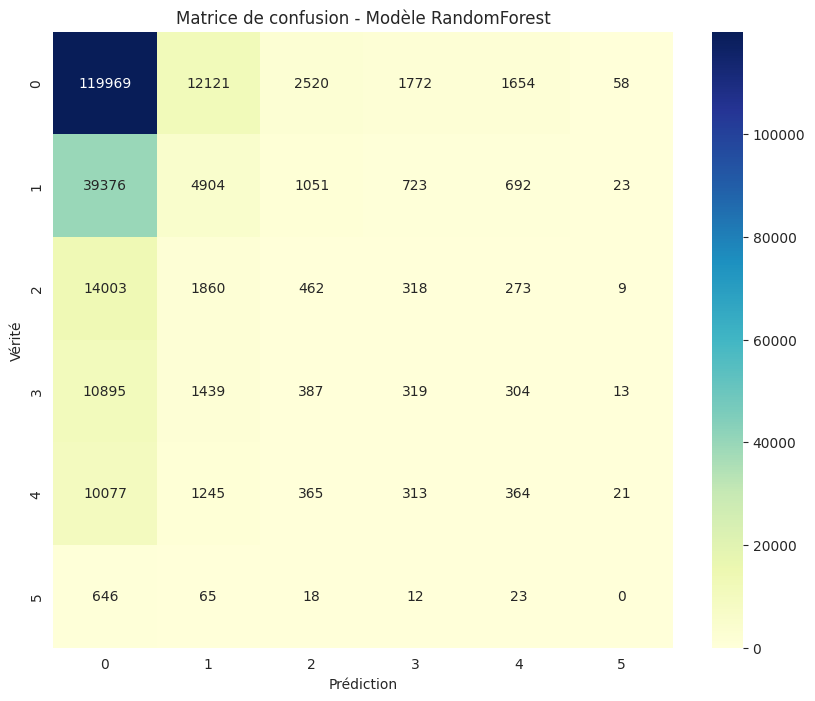

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest) avec OneHotEncoder
categorical_features = ['Reporting_Airline', 'Origin', 'Dest']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X = preprocessor.fit_transform(X)

from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest avec validation croisée
classifier = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, params, cv=5 , scoring='accuracy')
grid_search.fit(X_train, y_train)
classifier = grid_search.best_estimator_

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

ValueError: ignored

# RN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Préparer les données d'entraînement et de test
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Prétraitement des données : mise à l'échelle des variables numériques et encodage One-Hot des variables catégorielles
numerical_columns = ['Month', 'DayofMonth', 'DayOfWeek']
categorical_columns = ['Reporting_Airline', 'Origin', 'Dest']

# Prétraitement des données
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_processed = column_transformer.fit_transform(X).toarray()


from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Créer le modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Évaluer le modèle
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Training accuracy: {train_acc:.3f}, Testing accuracy: {test_acc:.3f}")

# Sauvegarder le modèle
#model.save("delay_prediction_model.h5")

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RN')
plt.show()

# SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle SVM')
plt.show()

#KNN

Précision: 0.5565279858428167

Rapport de classification:
               precision    recall  f1-score   support

           0       0.61      0.88      0.72    138094
           1       0.22      0.10      0.14     46769
           2       0.09      0.01      0.03     16925
           3       0.08      0.01      0.02     13357
           4       0.09      0.01      0.02     12385
           5       0.00      0.00      0.00       764

    accuracy                           0.56    228294
   macro avg       0.18      0.17      0.15    228294
weighted avg       0.43      0.56      0.47    228294



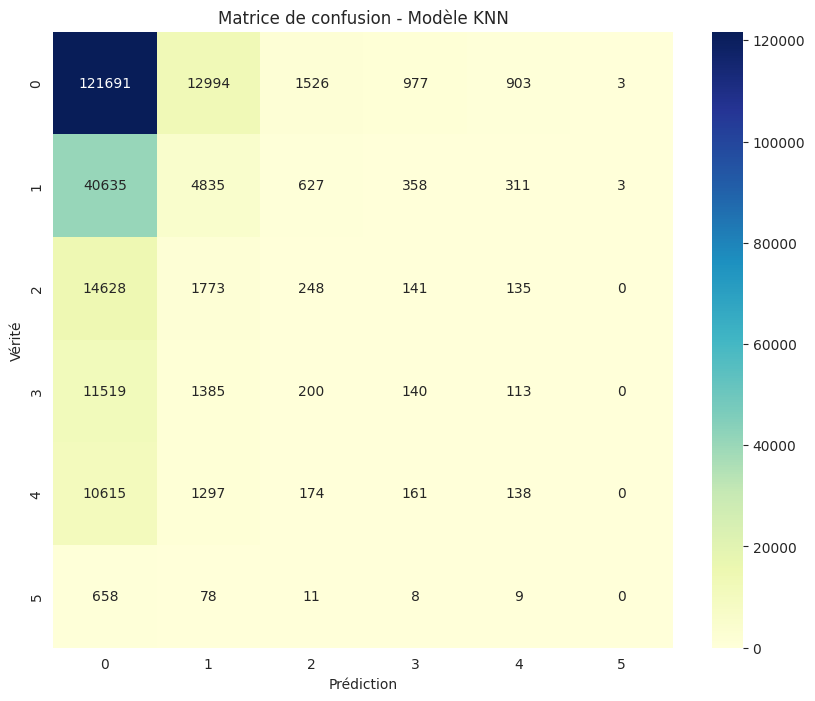

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle KNN')
plt.show()

# XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle XGBoust')
plt.show()

# LightGBM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = LGBMClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle LightGBM')
plt.show()

# 5 TOP COMPAGNIES

In [ ]:
import pandas as pd

# Créez une liste des valeurs de la colonne Reporting_Airline que vous souhaitez sélectionner
valeurs_selectionnees = ['United Airlines - UA']

# Effectuez la sélection en utilisant la méthode isin() pour filtrer les lignes
df_selectionne = df[df['Reporting_Airline'].isin(valeurs_selectionnees)].copy()

# Affichez le nouveau dataframe sélectionné
df_selectionne.head(3).append(df_selectionne.tail(3))

,Month,DayofMonth,DayOfWeek,Reporting_Airline,Origin,Dest,ArrDelay,ArrDelayCategory
45,10,24,3,United Airlines - UA,Minneapolis-St. Paul International Airport,Chicago O'Hare International Airport,-25.0,0
52,2,9,4,United Airlines - UA,Wichita Dwight D. Eisenhower National Airport,Denver International Airport,-5.0,0
64,11,3,7,United Airlines - UA,Chicago O'Hare International Airport,John Glenn Columbus International Airport,39.0,2
1141442,9,12,3,United Airlines - UA,Seattle-Tacoma International Airport,Denver International Airport,-15.0,0
1141448,2,21,6,United Airlines - UA,Newark Liberty International Airport,Chicago O'Hare International Airport,1.0,1
1141465,3,22,4,United Airlines - UA,Denver International Airport,General Mitchell International Airport,-18.0,0


In [ ]:
df_selectionne.shape

(87206, 8)

In [ ]:
# Compter le nombre de records pour chaque catégorie dans la colonne ArrDelayCategory
category_counts = df_selectionne['ArrDelayCategory'].value_counts()

# Trier les résultats par l'index des catégories
category_counts = category_counts.sort_index()

# Afficher le nombre de records pour chaque catégorie
print(category_counts)

0    82656
1    24654
2    14528
3     5773
Name: ArrDelayCategory, dtype: int64


Précision: 0.5701181057218209

Rapport de classification:
               precision    recall  f1-score   support

           0       0.64      0.87      0.74     10935
           1       0.18      0.07      0.10      3184
           2       0.18      0.07      0.10      2223
           3       0.11      0.04      0.06      1100

    accuracy                           0.57     17442
   macro avg       0.28      0.26      0.25     17442
weighted avg       0.46      0.57      0.50     17442



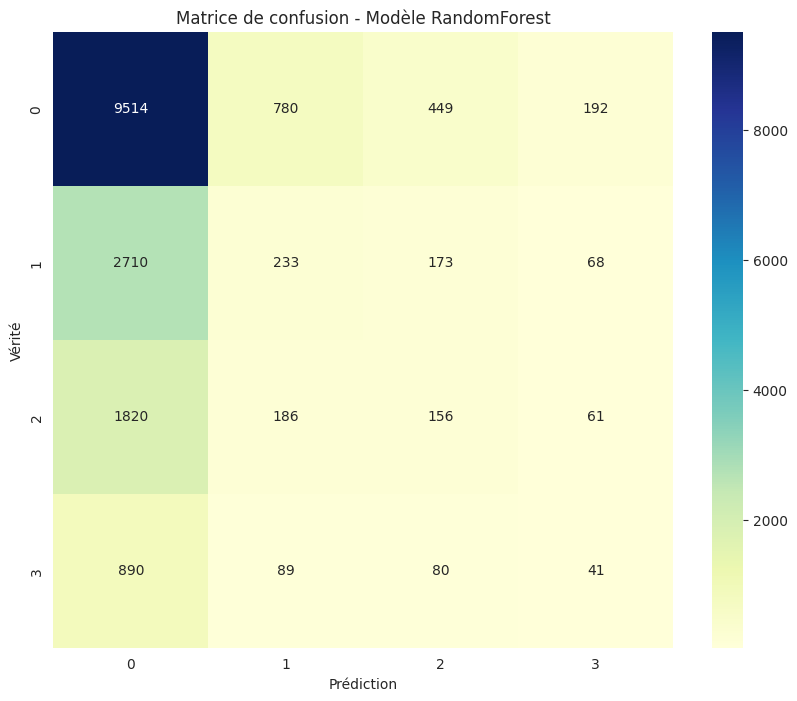

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculer les poids des classes
weights = len(y) / (4 * np.bincount(y))
class_weights = {i: weights[i] for i in range(4)}

# Créer et entraîner le modèle de classification Random Forest
classifier = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 4), yticklabels=range(0, 4))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

Scores de la validation croisée: [0.28511639 0.2831833  0.28415802 0.27607362 0.28398601]
Moyenne des scores de la validation croisée: 0.28250346750317373
Précision: 0.4710455702589271

Rapport de classification:
               precision    recall  f1-score   support

           0       0.83      0.37      0.51     54727
           1       0.37      0.53      0.44     15670
           2       0.34      0.64      0.44     11026
           3       0.28      0.99      0.44      5783

    accuracy                           0.47     87206
   macro avg       0.46      0.63      0.46     87206
weighted avg       0.65      0.47      0.48     87206



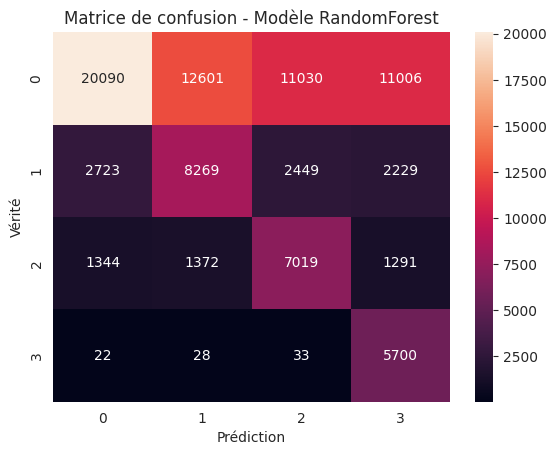

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imPipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Définir les colonnes catégorielles et numériques
categorical_cols = ['Reporting_Airline', 'Origin', 'Dest']
numerical_cols = ['Month', 'DayofMonth', 'DayOfWeek']

# Appliquer le OneHotEncoder aux colonnes catégorielles et le StandardScaler aux colonnes numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Créer le modèle de classification Random Forest
classifier = RandomForestClassifier(random_state=42)

# Définir le pipeline de sous-échantillonnage et de classification
pipeline = imPipeline(steps=[('preprocessor', preprocessor),
                             ('undersampler', RandomUnderSampler(random_state=42)),
                             ('classifier', classifier)])

# Appliquer la validation croisée
scores = cross_val_score(pipeline, X, y, cv=5)

print(f"Scores de la validation croisée: {scores}")
print(f"Moyenne des scores de la validation croisée: {np.mean(scores)}")

# Entraîner le modèle avec toutes les données
pipeline.fit(X, y)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = pipeline.predict(X)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y, y_pred)

# Afficher la matrice de confusion
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as imPipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Définir les colonnes catégorielles et numériques
categorical_cols = ['Reporting_Airline', 'Origin', 'Dest']
numerical_cols = ['Month', 'DayofMonth', 'DayOfWeek']

# Appliquer le OneHotEncoder aux colonnes catégorielles et le StandardScaler aux colonnes numériques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Créer le modèle de classification Random Forest
classifier = RandomForestClassifier(random_state=42)

# Définir le pipeline de sous-échantillonnage et de classification
pipeline = imPipeline(steps=[('preprocessor', preprocessor),
                             ('sampler', SMOTEENN(random_state=42)),
                             ('classifier', classifier)])

# Définir les hyperparamètres à tester
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
}

# Définir les métriques d'évaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
}

# Définir la validation croisée stratifiée
cv = StratifiedKFold(n_splits=5)

# Appliquer la validation croisée avec la recherche sur grille
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring, refit='f1')
grid_search.fit(X, y)

# Afficher les meilleurs hyperparamètres et le meilleur score
print(f"Meilleurs hyperparamètres: {grid_search.best_params_}")
print(f"Meilleur score F1: {grid_search.best_score_}")

# Utiliser le meilleur modèle pour prédire les catégories de retard
y_pred = grid_search.predict(X)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y, y_pred)

# Afficher la matrice de confusion
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

KeyboardInterrupt: ignored

Précision: 0.6513732711671826

Rapport de classification:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79     16639
           1       0.14      0.00      0.00      4856
           2       0.00      0.00      0.00      2901
           3       0.00      0.00      0.00      1127

    accuracy                           0.65     25523
   macro avg       0.20      0.25      0.20     25523
weighted avg       0.45      0.65      0.51     25523



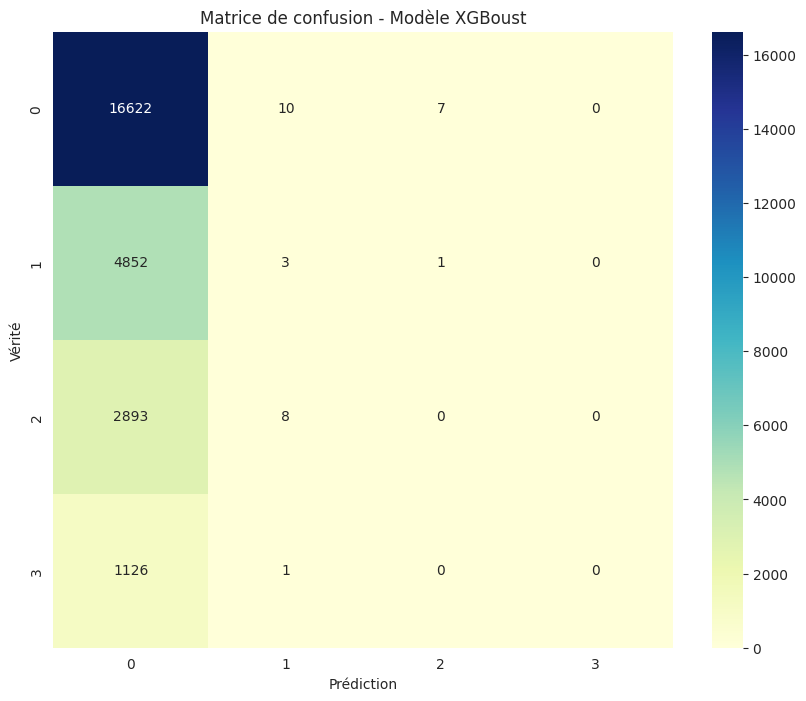

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 4), yticklabels=range(0, 4))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle XGBoust')
plt.show()

Epoch 1/10
1596/1596 [==============================] - 10s 4ms/step - loss: 0.9885 - accuracy: 0.6460 - val_loss: 0.9737 - val_accuracy: 0.6519
Epoch 2/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.9786 - accuracy: 0.6467 - val_loss: 0.9741 - val_accuracy: 0.6519
Epoch 3/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.9747 - accuracy: 0.6467 - val_loss: 0.9752 - val_accuracy: 0.6519
Epoch 4/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.9708 - accuracy: 0.6467 - val_loss: 0.9795 - val_accuracy: 0.6519
Epoch 5/10
1596/1596 [==============================] - 7s 4ms/step - loss: 0.9657 - accuracy: 0.6467 - val_loss: 0.9780 - val_accuracy: 0.6519
Epoch 6/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.9606 - accuracy: 0.6467 - val_loss: 0.9829 - val_accuracy: 0.6519
Epoch 7/10
1596/1596 [==============================] - 6s 4ms/step - loss: 0.9556 - accuracy: 0.6466 - val_loss: 0.9841 - val_accuracy

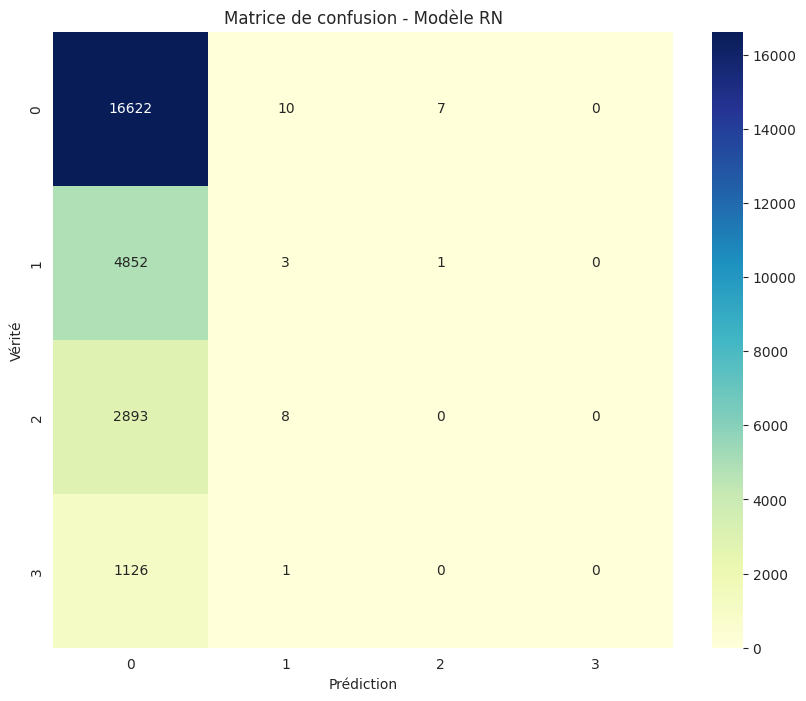

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Préparer les données d'entraînement et de test
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Prétraitement des données : mise à l'échelle des variables numériques et encodage One-Hot des variables catégorielles
numerical_columns = ['Month', 'DayofMonth', 'DayOfWeek']
categorical_columns = ['Reporting_Airline', 'Origin', 'Dest']

# Prétraitement des données
column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_processed = column_transformer.fit_transform(X).toarray()


from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Créer le modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Évaluer le modèle
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Training accuracy: {train_acc:.3f}, Testing accuracy: {test_acc:.3f}")

# Sauvegarder le modèle
#model.save("delay_prediction_model.h5")

# Évaluer le modèle
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 4), yticklabels=range(0, 4))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RN')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Préparer les données d'entraînement et de test
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Prétraitement des données
numerical_columns = ['Month', 'DayofMonth', 'DayOfWeek']
categorical_columns = ['Reporting_Airline', 'Origin', 'Dest']

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_processed = column_transformer.fit_transform(X).toarray()

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Calculer les poids des classes
class_weights = len(y) / (len(np.unique(y)) * np.bincount(y))
class_weights = {i : class_weights[i] for i in range(len(np.unique(y)))}

# Créer le modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec les poids de classe et avec EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64, class_weight=class_weights)


# Évaluer le modèle
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Training accuracy: {train_acc:.3f}, Validation accuracy: {val_acc:.3f}, Testing accuracy: {test_acc:.3f}")

Epoch 1/30
1277/1277 [==============================] - 10s 5ms/step - loss: 1.3844 - accuracy: 0.2683 - val_loss: 1.3654 - val_accuracy: 0.2828
Epoch 2/30
1277/1277 [==============================] - 5s 4ms/step - loss: 1.3685 - accuracy: 0.2829 - val_loss: 1.3616 - val_accuracy: 0.2915
Epoch 3/30
1277/1277 [==============================] - 5s 4ms/step - loss: 1.3553 - accuracy: 0.2799 - val_loss: 1.3435 - val_accuracy: 0.3004
Epoch 4/30
1277/1277 [==============================] - 6s 5ms/step - loss: 1.3427 - accuracy: 0.2789 - val_loss: 1.4094 - val_accuracy: 0.2183
Epoch 5/30
1277/1277 [==============================] - 5s 4ms/step - loss: 1.3274 - accuracy: 0.2808 - val_loss: 1.3909 - val_accuracy: 0.2338
Epoch 6/30
1277/1277 [==============================] - 6s 4ms/step - loss: 1.3106 - accuracy: 0.2820 - val_loss: 1.3323 - val_accuracy: 0.3010
Epoch 7/30
1277/1277 [==============================] - 5s 4ms/step - loss: 1.2933 - accuracy: 0.2855 - val_loss: 1.3994 - val_accuracy

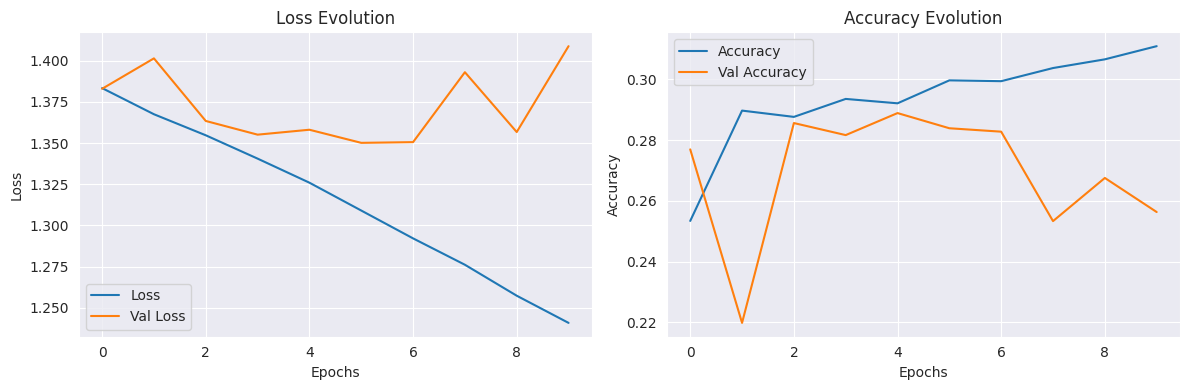

798/798 [==============================] - 1s 1ms/step

Rapport de classification:
               precision    recall  f1-score   support

           0       0.70      0.25      0.37     16639
           1       0.21      0.25      0.22      4856
           2       0.13      0.22      0.16      2901
           3       0.06      0.45      0.10      1127

    accuracy                           0.25     25523
   macro avg       0.27      0.29      0.21     25523
weighted avg       0.52      0.25      0.31     25523



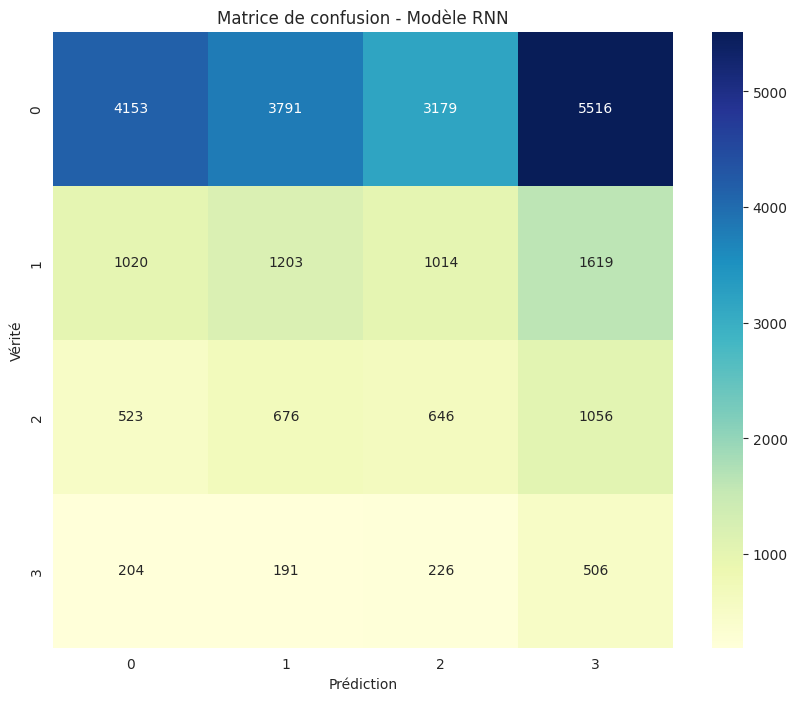

In [ ]:
from sklearn.metrics import classification_report
# Afficher les courbes d'apprentissage
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.tight_layout()
plt.show()

# Prédictions sur l'ensemble de test
y_pred = np.argmax(model.predict(X_test), axis=-1)

report = classification_report(y_test, y_pred)
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RNN')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Préparer les données d'entraînement et de test
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Prétraitement des données
numerical_columns = ['Month', 'DayofMonth', 'DayOfWeek']
categorical_columns = ['Reporting_Airline', 'Origin', 'Dest']

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_processed = column_transformer.fit_transform(X).toarray()

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Créer le modèle de réseau de neurones
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

# Compiler le modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

# Évaluer le modèle
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Training accuracy: {train_acc:.3f}, Validation accuracy: {val_acc:.3f}, Testing accuracy: {test_acc:.3f}")

Epoch 1/30
3303/3303 [==============================] - 13s 4ms/step - loss: 1.2697 - accuracy: 0.3917 - val_loss: 1.4114 - val_accuracy: 0.2720
Epoch 2/30
3303/3303 [==============================] - 12s 4ms/step - loss: 1.1216 - accuracy: 0.4864 - val_loss: 1.3131 - val_accuracy: 0.3713
Epoch 3/30
3303/3303 [==============================] - 12s 4ms/step - loss: 1.0476 - accuracy: 0.5258 - val_loss: 1.4246 - val_accuracy: 0.3203
Epoch 4/30
3303/3303 [==============================] - 12s 4ms/step - loss: 0.9961 - accuracy: 0.5538 - val_loss: 1.5035 - val_accuracy: 0.2913
Epoch 5/30
3303/3303 [==============================] - 12s 4ms/step - loss: 0.9599 - accuracy: 0.5725 - val_loss: 1.4407 - val_accuracy: 0.3437
Epoch 6/30
3303/3303 [==============================] - 12s 4ms/step - loss: 0.9304 - accuracy: 0.5863 - val_loss: 1.4320 - val_accuracy: 0.3745
Epoch 7/30
3303/3303 [==============================] - 11s 3ms/step - loss: 0.9059 - accuracy: 0.5993 - val_loss: 1.4470 - val_ac

798/798 [==============================] - 1s 1ms/step

Rapport de classification:
               precision    recall  f1-score   support

           0       0.68      0.47      0.56     16639
           1       0.20      0.30      0.24      4856
           2       0.12      0.18      0.15      2901
           3       0.05      0.11      0.07      1127

    accuracy                           0.39     25523
   macro avg       0.26      0.27      0.25     25523
weighted avg       0.50      0.39      0.43     25523



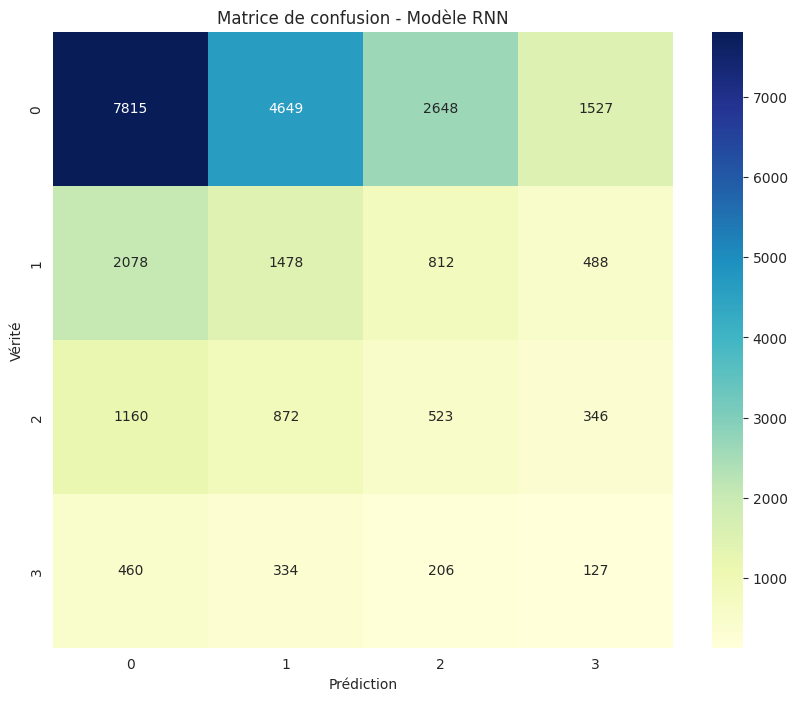

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = np.argmax(model.predict(X_test), axis=-1)

report = classification_report(y_test, y_pred)
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RNN')
plt.show()

In [ ]:
pip install imbalanced-learn tensorflow_addons keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 18.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from tensorflow_addons.losses import SigmoidFocalCrossEntropy

# Préparer les données d'entraînement et de test
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Prétraitement des données
numerical_columns = ['Month', 'DayofMonth', 'DayOfWeek']
categorical_columns = ['Reporting_Airline', 'Origin', 'Dest']

# Over sampling with SMOTE-NC
smote_nc = SMOTENC(categorical_features=[X.columns.get_loc(c) for c in categorical_columns], random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

column_transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

X_processed = column_transformer.fit_transform(X_resampled).toarray()

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Définir le modèle avec Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', 
                                 min_value=32, 
                                 max_value=512, 
                                 step=32),
                    activation='relu', input_dim=X_train.shape[1]))
    
    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers.
        model.add(Dense(units=hp.Int(f'layer_{i}_units',
                                     min_value=32,
                                     max_value=512,
                                     step=32), 
                        activation='relu'))

    model.add(Dense(len(y.unique()), activation='softmax'))

    # Compiler le modèle
    model.compile(optimizer=Adam(
        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
        loss=SigmoidFocalCrossEntropy(),
        metrics = ['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

# Entraîner le modèle avec les poids de classe et avec EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[callback])

# Récupérer le meilleur modèle
model = tuner.get_best_models(num_models=1)[0]

# Évaluer le modèle
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Training accuracy: {train_acc:.3f}, Validation accuracy: {val_acc:.3f}, Testing accuracy: {test_acc:.3f}")



Trial 1 Complete [00h 07m 29s]
val_accuracy: 0.25096409022808075

Best val_accuracy So Far: 0.25096409022808075
Total elapsed time: 00h 07m 29s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
352               |352               |units_input
1                 |4                 |n_layers
128               |224               |layer_0_units
0.001             |0.001             |learning_rate
512               |32                |layer_1_units
512               |32                |layer_2_units
320               |32                |layer_3_units

Epoch 1/10
6613/6613 [==============================] - 41s 6ms/step - loss: -227.3819 - accuracy: 0.2506 - val_loss: -227.3959 - val_accuracy: 0.2493
Epoch 2/10
6613/6613 [==============================] - 33s 5ms/step - loss: -228.1520 - accuracy: 0.2506 - val_loss: -227.3959 - val_accuracy: 0.2493
Epoch 3/10
6613/6613 [==============================] - 31s 5ms/step - loss: -228.1492 - accuracy: 0.2506 - val_loss

Exception ignored in: <function _xla_gc_callback at 0x7f9b5c1bb910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 1/10
1631/6613 [======>.......................] - ETA: 22s - loss: -226.0195 - accuracy: 0.2497

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Appliquer OneHotEncoder aux colonnes catégorielles (Reporting_Airline, Origin, Dest)
# et StandardScaler aux colonnes numériques (Month, DayofMonth, DayOfWeek)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Month', 'DayofMonth', 'DayOfWeek']),
        ('cat', OneHotEncoder(), ['Reporting_Airline', 'Origin', 'Dest'])
    ])

# Appliquer le prétraitement aux caractéristiques
X = preprocessor.fit_transform(X)

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification SVM
classifier = SVC(random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle SVM')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
classifier = LGBMClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 4), yticklabels=range(0, 4))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle LightGBM')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Créer le modèle de classification Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Créer la grille d'hyperparamètres pour la recherche
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

# Créer la recherche sur grille avec validation croisée
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, scoring='f1_macro')

# Entraîner le modèle
grid_search.fit(X_train, y_train)

# Obtenir le meilleur estimateur
best_classifier = grid_search.best_estimator_

# Prédire les catégories de retard pour l'ensemble de test
y_pred = best_classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 4), yticklabels=range(0, 4))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()


NameError: ignored

In [ ]:
count_0 = 398014
count_1 = 130144
count_2 = 81690
count_3 = 34251

In [ ]:
# Initial bias calculation should consider all counts
initial_bias = np.log([count_1/count_0, count_2/count_0, count_3/count_0])
print('Initial bias:', initial_bias)

weight_for_0 = (1/count_0)*((count_0 + count_1 + count_2 + count_3 )/6.0)
weight_for_1 = (1/count_1)*((count_0 + count_1 + count_2 + count_3 )/6.0)
weight_for_2 = (1/count_2)*((count_0 + count_1 + count_2 + count_3 )/6.0)
weight_for_3 = (1/count_3)*((count_0 + count_1 + count_2 + count_3)/6.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))

Initial bias: [-1.11784565 -1.58355559 -2.45277142]
Weight for class 0: 0.27
Weight for class 1: 0.82
Weight for class 2: 1.31
Weight for class 3: 3.13


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
df_selectionne = shuffle(df, random_state=42)

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df_selectionne[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df_selectionne['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest)
encoder = LabelEncoder()
X['Reporting_Airline'] = encoder.fit_transform(X['Reporting_Airline'])
X['Origin'] = encoder.fit_transform(X['Origin'])
X['Dest'] = encoder.fit_transform(X['Dest'])

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest
# Utiliser les poids de classe définis précédemment
classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight)
classifier.fit(X_train, y_train)

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sélectionner les colonnes pour les features (X) et la target (y)
X = df[['Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']]
y = df['ArrDelayCategory']

# Encoder les colonnes catégorielles (Reporting_Airline, Origin, Dest) avec OneHotEncoder
categorical_features = ['Reporting_Airline', 'Origin', 'Dest']
one_hot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical_features)], remainder='passthrough')
X = preprocessor.fit_transform(X)

from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

# Diviser les données en ensembles d'apprentissage et de test (80% pour l'apprentissage, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification Random Forest avec validation croisée
classifier = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(classifier, params, cv=5 , scoring='accuracy')
grid_search.fit(X_train, y_train)
classifier = grid_search.best_estimator_

# Prédire les catégories de retard pour l'ensemble de test
y_pred = classifier.predict(X_test)

# Calculer la précision et afficher le rapport de classification
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision: {accuracy}")
print("\nRapport de classification:\n", report)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(0, 6), yticklabels=range(0, 6))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - Modèle RandomForest')
plt.show()